# Import

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import math
import itertools 
import pandas as pd
import numpy as np
import io
import msoffcrypto
from sklearn.metrics import r2_score
import openpyxl
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import json
from math import factorial as fact
from IPython.display import Markdown, display
import networkx as nx
import requests
import toml
import sys, os
import collections
from types import SimpleNamespace
import copy

%matplotlib inline 
%config Completer.use_jedi = False

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

from utils import *

# eval indiv

In [5]:
file = {'SheetMapName' : 'map', 'uploaded_file' : None}
algo = load_data_brut(file)
algo.Group = [0,2]

Init algo namespace


In [ ]:
algo.dfslot

In [215]:
keydrop= ["confs", "dfslot","dfline","indivs","df",'A0','DataCategorie']
d = {k : v for k,v in vars(algo).items() if k not in keydrop}
s = pd.Series(d).rename('Val').astype(str)
s.index = s.index.astype(str)
s

Group                                                   [0, 2]
pop                                                         50
fitness                                                   dist
crossover                                                  0.4
mutation                                                   0.4
Nlim                                                       2.0
Pmax                                                         3
Plot                                                     False
epoch                                                        0
Nindiv                                                       0
Nrepro                                                       0
Tuyau                                                   ['Ta']
Pompes                                            ['Pa', 'Pa']
Pvals                               [-0.000516, -0.0154, 4.87]
EV                                                      ['Ea']
Nozzles                   ['fixed', 'fixed', 'fixed', '

In [4]:
Name = 'E1-C0,E1-C1,E1-C2,E1-C3,P1-E1'
# Name  = 'E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1'
indiv = Indiv_reverse(Name,algo) 
indiv

{'Clist': [0, 1, 2, 3],
 'CtoE': [1, 1, 1, 1],
 'Econnect': {1: [0, 1, 2, 3]},
 'Elist': [1],
 'Ecount': 1,
 'EtoP': [1],
 'Pconnect': {1: [1]},
 'Plist': [1],
 'Pcount': 1,
 'List_EtoC': [['E1-C0', 'E1-C1', 'E1-C2', 'E1-C3']],
 'List_PtoE': [['P1-E1']],
 'dist_Connect': {'E1-C0': 0.8,
  'E1-C1': 1.44,
  'E1-C2': 0.48,
  'E1-C3': 2.4,
  'P1-E1': 0.48},
 'dist': 5.6,
 'Name': ['E1-C0', 'E1-C1', 'E1-C2', 'E1-C3', 'P1-E1'],
 'ID': 1,
 'Name_txt': 'E1-C0,E1-C1,E1-C2,E1-C3,P1-E1',
 'Epoch': 0,
 'PressionList': [3.92, 4.48, 3.93, 4.46],
 'DebitList': [10.44, 11.16, 10.45, 11.13],
 'Debit': 43.2,
 'Masse': 1433,
 'Cout': 57,
 'Alive': True}

In [6]:
df = pd.read_excel('test.xlsx', sheet_name= 'Sheet{}'.format(5), header=0).set_index('case').T
df

case,pompe,Strat,C,group,split,pression,debit,debit total
0,1,Full_s,"R, F, F, F","0,1,2,3","0,1,2,3","2.2, 4.4, 4.5, 4.4","36.3, 11.1, 11.1, 11.1",69.7
1,1,gr E1,"R, F, F, F","(0,2),(1,3)","0,1,2,3",NaN,NaN,65.3
2,1,g3,"R, F, F, F","0, (1,2) ,3","0,1,2,3","2.2, 4.1, 4.1, 4.4","36,3, 10.7, 10.7, 11.1",NaN
3,1,g3p,"R, F, F, F","0, (1,2) , 3","0, (1,2) , 3",NaN,NaN,NaN
4,1,?,"R, F, F, F","0, (1,2) , 3","(0,1,2),3",NaN,NaN,NaN


# Split save

## Combinatoire

In [6]:
SplitDict = {}
for Size in range(2,5):
    List = list(range(Size))
    a = np.array(list(itertools.product(List, repeat=Size)))
    
    mask = (a[:,0] == 0)
    for i in range(1,Size) :
        mask = mask & (a[:,i] <= a[:,:i].max(1)+1)
    a = a[mask]   
    
    for i in range(len(a)):
        s = a[i]
        u, idx, counts = np.unique(s, return_index=True, return_counts  = True, axis = 0)
        val = u[counts == 1]
        s[np.isin(s,val)] = -1 
        a[i] = s
    SplitDict[Size] = a

In [7]:
SplitDict

{2: array([[ 0,  0],
        [-1, -1]]),
 3: array([[ 0,  0,  0],
        [ 0,  0, -1],
        [ 0, -1,  0],
        [-1,  1,  1],
        [-1, -1, -1]]),
 4: array([[ 0,  0,  0,  0],
        [ 0,  0,  0, -1],
        [ 0,  0, -1,  0],
        [ 0,  0,  1,  1],
        [ 0,  0, -1, -1],
        [ 0, -1,  0,  0],
        [ 0,  1,  0,  1],
        [ 0, -1,  0, -1],
        [ 0,  1,  1,  0],
        [-1,  1,  1,  1],
        [-1,  1,  1, -1],
        [ 0, -1, -1,  0],
        [-1,  1, -1,  1],
        [-1, -1,  2,  2],
        [-1, -1, -1, -1]])}

In [8]:
Group  = [0,1,2,3]
Egroup = indiv['Econnect'][1]
Egroup = [e for e in Egroup if e in Group ]
Size = len(Egroup)
Size

3

In [9]:
ListIndivs = []
for s in SplitDict[Size]: 
    d = collections.defaultdict(list)
    for i in range(Size): 
        d[s[i]].append(Egroup[i])
    d = dict(sorted(d.items())) 
    NewIndiv = copy.deepcopy(indiv)
    NewIndiv['Egroup'] = Egroup
    NewIndiv['Split'] = d
    ListIndivs.append(NewIndiv)

In [10]:
ColSysteme = ['Clist','Name','dist_Connect','List_EtoC','List_PtoE']
ColAlgo = ['CtoE','EtoP','Econnect','Elist','Ecount','Pconnect','Plist','Pcount']
Col_drop = ColSysteme +ColAlgo
pd.DataFrame(ListIndivs).drop(columns= Col_drop)

,dist,ID,Name_txt,Epoch,PressionList,DebitList,Debit,Masse,Cout,Alive,Egroup,Split
0,7.6,2,"E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1",0,"[4.5, 4.44, 4.51, 4.46]","[11.18, 11.11, 11.19, 11.13]",44.6,1661,61,True,"[0, 2, 3]","{0: [0, 2, 3]}"
1,7.6,2,"E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1",0,"[4.5, 4.44, 4.51, 4.46]","[11.18, 11.11, 11.19, 11.13]",44.6,1661,61,True,"[0, 2, 3]","{-1: [3], 0: [0, 2]}"
2,7.6,2,"E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1",0,"[4.5, 4.44, 4.51, 4.46]","[11.18, 11.11, 11.19, 11.13]",44.6,1661,61,True,"[0, 2, 3]","{-1: [2], 0: [0, 3]}"
3,7.6,2,"E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1",0,"[4.5, 4.44, 4.51, 4.46]","[11.18, 11.11, 11.19, 11.13]",44.6,1661,61,True,"[0, 2, 3]","{-1: [0], 1: [2, 3]}"
4,7.6,2,"E0-C1,E1-C0,E1-C2,E1-C3,P1-E0,P1-E1",0,"[4.5, 4.44, 4.51, 4.46]","[11.18, 11.11, 11.19, 11.13]",44.6,1661,61,True,"[0, 2, 3]","{-1: [0, 2, 3]}"


## Calcul

### Func

In [ ]:
def debit_2(algo, d_EtoC_list,d_PtoE,EClist, group = True, split = True):
    # d_EtoC = Dict_dist['EtoC']
    # d_PtoE = Dict_dist['PtoE']
    p = [-5.16e-04, -1.54e-02, 4.87]
    p = algo.Pvals
    # p = [-6.61e-4,-0.0286,12.1]
    E0 = 7.64e-04
    coef_E  = np.ones(len(EClist)) * E0
    # coef_E  = np.array([E0 if c in [0,3] else 0 for c in Clist])
    # print(Clist , coef_E)
    coef_C  = 0.036
    coef_C  = [algo.Nvals[i] for i in EClist]
    coef_C  = np.array(coef_C)
    coef_d  = 2.35e-04    
    
    A = coef_E + d_EtoC_list * coef_d + coef_C 
    Z = ( A**-0.5).sum() if group else A**-0.5
    As , Bs, Cs = p[0] - (coef_d * d_PtoE) - 1/(Z**2), p[1] , p[2]
    delta = (Bs**2) - (4 * As * Cs)
    Qt  = np.array((- Bs - delta**0.5)/(2*As))
    Pt = np.array(Qt**2 / Z**2)
    a0 = p[0] * (Qt**2) + p[1] * Qt + p[2] - Pt
    Qi = (Pt / A)**0.5
    Pi = coef_C * (Qi**2)
    key = ['Qt','Pt','Qi','Pi']
    val = [Qt, Pt, Qi, Pi]
    val = [v.round(2) for v in val]
    return dict(zip(key,val))

In [67]:
def Calcul_Debit_2(algo ,indiv, group, split = None):
    D = algo.Comb  
    Group = algo.Group  
    Clist = D['C']
    Econnect = indiv['Econnect']
    Pconnect = indiv['Pconnect']
    EtoP = indiv['EtoP']
    Pression = []
    Debit = []

    Cpression = {}
    Cdebit = {}
    grouped = False
    split =  {0: [0], 1: [1, 2, 3]}
    for i, (e,EClist) in enumerate(Econnect.items()):
        p = EtoP[i]
        name = 'P{}-E{}'.format(p,e)
        VerifGroup = np.isin(Group,  EClist)
        # EClistTotal = [EClist]
        # if VerifGroup.all() & (len(Group) > 0):
        EClistTotal = [[i for i in EClist if i in Group], [i for i in EClist if i not in Group]]          
        grouped = True
        for j,  EClist in enumerate(EClistTotal):
            if j > 0 : grouped = False # bascule a No group apres le passage group 
            if len(EClist)>0: # bug avec calcul array
                d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
                d_PtoE = algo.dist['P{}-E{}'.format(p,e)]
                res = debit_2(algo, d_EtoC_list,d_PtoE, EClist, grouped)

                Debit = Debit + list(res['Qi'])
                Pi = list(res['Pi'])
                PressionConnect = dict(zip(EClist, Pi))
                Cpression.update(PressionConnect)                
                Qi = list(res['Qi'])
                Cdebit.update(dict(zip(EClist, Qi)))

                keys = ['i', 'j' ,'Clist','d_EtoC_list', 'd_PtoE', 'EClist', 'Group','grouped', 'EClistTotal', 'PressionConnect']
                vals = [i, j ,Clist , d_EtoC_list, d_PtoE, EClist, Group,grouped, EClistTotal, PressionConnect]
                print(str(dict(zip(keys,vals))))
    PressionList = [Cpression[i] for i in D['C']]
    DebitList    = [Cdebit[i] for i in D['C']]
    # print(Cpression)
    SumDebit = round(sum(Debit),1)   
    keys = ['PressionList','DebitList','Debit']
    vals = [PressionList, DebitList, SumDebit] 
    return dict(zip(keys,vals))

In [84]:
split = '0, (1,2) , (3, 4)'

def Uncode_split(split):
    n = 0
    tosplit = False 
    d = collections.defaultdict(list)
    for i in split: 
        if i == '(':
            tosplit =  True
            n+= 1
        if i == ')': 
            tosplit =  False
        if i.isdigit(): 
            i = int(i)
            if tosplit: d[n].append(i)
            else : d[0].append(i)
    return d

split = '0, (1,2, 3)'
split = Uncode_split(split)
split =  {0: [0], 1: [1, 2, 3]}

defaultdict(list, {0: [0], 1: [1, 2, 3]})

### Run

In [48]:
split = '0, (1,2, 3)'
Uncode_split(split)

defaultdict(list, {0: [0], 1: [1, 2, 3]})

In [79]:
Nozzles = ['ramp', 'fixed', 'fixed', 'fixed']
algo.Nozzles = Nozzles
Nvals   = [algo.DataCategorie['Nozzle']['Values'][n]['a'] for n in Nozzles]
algo.Nvals = dict(zip(Clist, Nvals))
algo.Group  = [1,2]
Calcul_Debit_2(algo ,indiv, group)

{'i': 0, 'j': 0, 'Clist': [0, 1, 2, 3], 'd_EtoC_list': array([1.44, 0.48]), 'd_PtoE': 0.48, 'EClist': [1, 2], 'Group': [1, 2], 'grouped': True, 'EClistTotal': [[1, 2], [0, 3]], 'PressionConnect': {1: 4.12, 2: 4.15}}
{'i': 0, 'j': 1, 'Clist': [0, 1, 2, 3], 'd_EtoC_list': array([0.8, 2.4]), 'd_PtoE': 0.48, 'EClist': [0, 3], 'Group': [1, 2], 'grouped': False, 'EClistTotal': [[1, 2], [0, 3]], 'PressionConnect': {0: 2.23, 3: 4.46}}


{'PressionList': [2.23, 4.12, 4.15, 4.46],
 'DebitList': [36.25, 10.7, 10.74, 11.13],
 'Debit': 68.8}

In [57]:
indiv

{'Clist': [0, 1, 2, 3],
 'CtoE': [1, 1, 1, 1],
 'Econnect': {1: [0, 1, 2, 3]},
 'Elist': [1],
 'Ecount': 1,
 'EtoP': [1],
 'Pconnect': {1: [1]},
 'Plist': [1],
 'Pcount': 1,
 'List_EtoC': [['E1-C0', 'E1-C1', 'E1-C2', 'E1-C3']],
 'List_PtoE': [['P1-E1']],
 'dist_Connect': {'E1-C0': 0.8,
  'E1-C1': 1.44,
  'E1-C2': 0.48,
  'E1-C3': 2.4,
  'P1-E1': 0.48},
 'dist': 5.6,
 'Name': ['E1-C0', 'E1-C1', 'E1-C2', 'E1-C3', 'P1-E1'],
 'ID': 4,
 'Name_txt': 'E1-C0,E1-C1,E1-C2,E1-C3,P1-E1',
 'Epoch': 0,
 'PressionList': [4.5, 4.12, 4.15, 4.46],
 'DebitList': [11.18, 10.7, 10.74, 11.13],
 'Debit': 43.8,
 'Masse': 1433,
 'Cout': 57,
 'Alive': True}

In [ ]:
[2.2, 4.4, 4.5, 2.0]
[36.3, 11.1, 11.1, 34.5]

In [71]:
dc = {'i': 0, 'j': 0, 'Clist': [0, 1, 2, 3], 'd_EtoC_list': np.array([0.8 , 1.44, 0.48, 2.4 ]),
      'd_PtoE': 0.48, 'EClist': [0, 1, 2, 3], 'Group': [0, 1, 2, 3], 'grouped': True,
      'EClistTotal': [[0, 1, 2, 3], []], 'PressionConnect': {0: 1.47, 1: 2.22, 2: 2.24, 3: 2.21}}

In [81]:
dc = {'i': 0, 'j': 0, 'Clist': [0, 1, 2, 3],
      'd_EtoC_list': np.array([1.44, 0.48]), 'd_PtoE': 0.48, 'EClist': [1, 2], 'Group': [1, 2],
      'grouped': True, 'EClistTotal': [[1, 2], [0, 3]], 'PressionConnect': {1: 4.12, 2: 4.15}}

In [82]:
# d_EtoC = Dict_dist['EtoC']
# d_PtoE = Dict_dist['PtoE']

d_EtoC_list = dc['d_EtoC_list']
d_PtoE = dc['d_PtoE']
EClist = dc['EClist']
group = True

p = [-5.16e-04, -1.54e-02, 4.87]
p = algo.Pvals
# p = [-6.61e-4,-0.0286,12.1]
E0 = 7.64e-04
coef_E  = np.ones(len(EClist)) * E0
coef_E  = np.array([E0 if c in [0,3] else 0 for c in EClist])
coef_E = 0
# print(Clist , coef_E)
coef_C  = 0.036
coef_C  = [algo.Nvals[i] for i in EClist]
coef_C  = np.array(coef_C)
coef_d  = 2.35e-04    
coef_E , coef_C , coef_d

A = coef_E + d_EtoC_list * coef_d + coef_C 
Z = ( A**-0.5).sum() if group else A**-0.5
# Z = A**-0.5

As = p[0] - (coef_d * d_PtoE) - 1/(Z**2) - E0
Bs = p[1]
Cs = p[2]

delta = (Bs**2) - (4 * As * Cs)
Qt  = np.array((- Bs - delta**0.5)/(2*As))
Pt = np.array(Qt**2 / Z**2)
a0 = p[0] * (Qt**2) + p[1] * Qt + p[2] - Pt
Qi = (Pt / A)**0.5
Pi = coef_C * (Qi**2)
key = ['Qt','Pt','Qi','Pi']
val = [Qt, Pt, Qi, Pi]
val = [v.round(2) for v in val]
dict(zip(key,val))

(0, array([0.036, 0.036]), 0.000235)

{'Qt': 20.86,
 'Pt': 3.94,
 'Qi': array([10.42, 10.45]),
 'Pi': array([3.91, 3.93])}

## Test si multiple E slot 

In [54]:
D = algo.Comb  
Group = algo.Group  
Clist = D['C']
Econnect = indiv['Econnect']

Pconnect = indiv['Pconnect']
EtoP = indiv['EtoP']
Pression = []
Debit = []
# Data = {}
# Pression_C = []
# on loop sur chaque EV pour connect to C et faire calcul Pt Qt coté pompe et Pi Qi coté Capteur
Cpression = {}
Cdebit = {}
grouped = False

print(Group, Econnect)
for i, (e,EClist) in enumerate(Econnect.items()):
    p = EtoP[i]
    name = 'P{}-E{}'.format(p,e)
    VerifGroup = np.isin(Group,  EClist)
    # EClistTotal = [EClist]
    # if VerifGroup.all() & (len(Group) > 0):
    EClistTotal = [[i for i in EClist if i in Group], [i for i in EClist if i not in Group]]          
    grouped = True
    for j,  EClist in enumerate(EClistTotal):
        if j >0 : grouped = False # bascule a No group apres le passage group 
        if len(EClist)>0: # bug avec calcul array
            print(i,j,e,EClist , grouped, EClist)
            if grouped : Egroup = EClist

[0, 2] {0: [1], 1: [0, 2, 3]}
0 1 0 [1] False [1]
1 0 1 [0, 2] True [0, 2]
1 1 1 [3] False [3]


In [66]:
Esplit = collections.defaultdict(list)

In [62]:
Size = len(Egroup)
Size
s = SplitDict[Size][0]
s

d = collections.defaultdict(list)
for i in range(Size): 
    d[s[i]].append(Egroup[i])
d.keys()
d

2

array([0, 0])

dict_keys([0])

defaultdict(list, {0: [0, 2]})

# PF ANCIEN

## func

In [6]:
def Path1(A,start): 
    N = len(A)
    v0 = np.array([-1,1,-N,N])
    #     v0 = np.array([-1,1,-N,N, -N-1, -N+1,N+1,N-1])
    Dim = len(v0)
    e = 2
    A[start] = e
    a = A.reshape(-1)
    v = np.where(a == e)  

    while len(v) > 0 :
        v = np.tile(v, (Dim, 1)).T + v0
        v = v[np.where(a[v]==0)]
        v = np.unique(v)        
        e+=1
        a[v]=e
    return a.reshape((N,N))

def Path2(A,start,goal):
    N = len(A)
    v0 = np.array([-1,1,-N,N])
    #     v0 = np.array([-1,1,-N,N, -N-1, -N+1,N+1,N-1])
    Dim = len(v0)
    e1,e2  = A[start] , A[goal]
    a = A.reshape(-1)
    v = goal[1] + goal[0]*N
    L  = [goal]
    while e2 > 2:
        v = v + v0
        v[v > len(a)] = len(a)-1
        v = v[np.where((a[v] < e2) & (a[v] >= 2))]
        idx = a[v].argmin()
        v = v[idx]
        e2 = a[v]
        pos = (int(np.ceil(v/N)-1),  v%N)
        L.insert(0,pos)
    return L

## Run

In [158]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
with open(file, 'r') as f:
      data = json.load(f)
        


In [159]:
dfline  = pd.DataFrame(data['layers'][2]['objects']).drop(columns=['rotation','width','name','height','visible','id']).rename(columns = {'class' : 'Class'})        
dfline

,Class,polyline,properties,x,y
0,E-P,"[{'x': 8, 'y': 0}, {'x': 0, 'y': 0}]","[{'name': 'end', 'type': 'string', 'value': '0...",28,120
1,E-P,"[{'x': 0, 'y': 72}, {'x': 0, 'y': 0}]","[{'name': 'end', 'type': 'string', 'value': '1...",40,44
2,E-P,"[{'x': 24, 'y': 0}, {'x': 0, 'y': 0}]","[{'name': 'end', 'type': 'string', 'value': '1...",44,40
3,E-P,"[{'x': 40, 'y': -72}, {'x': 40, 'y': -64}, {'x...","[{'name': 'end', 'type': 'string', 'value': '0...",28,116
4,C-E,"[{'x': 0, 'y': -4}, {'x': 0, 'y': 8}, {'x': 16...","[{'name': 'end', 'type': 'string', 'value': '1...",56,16
5,C-E,"[{'x': 0, 'y': 4}, {'x': -12, 'y': 4}, {'x': -...","[{'name': 'end', 'type': 'string', 'value': '0...",100,40
6,C-E,"[{'x': -4, 'y': -8}, {'x': 4, 'y': -8}, {'x': ...","[{'name': 'end', 'type': 'string', 'value': '0...",16,48
7,C-E,"[{'x': 4, 'y': 0}, {'x': -20, 'y': 0}]","[{'name': 'end', 'type': 'string', 'value': '1...",96,36
8,C-E,"[{'x': 0, 'y': 0}, {'x': 0, 'y': 44}, {'x': 0,...","[{'name': 'end', 'type': 'string', 'value': '0...",52,12
9,C-E,"[{'x': 0, 'y': 0}, {'x': 12, 'y': 0}, {'x': 12...","[{'name': 'end', 'type': 'string', 'value': '1...",12,36


In [160]:
dfslot = algo.dfslot
dfslot

,Class,id,Name,x,y,ID,Color
0,C,41,3,3,9,C3,10
1,C,38,2,6,2,C2,10
2,C,40,1,0,2,C1,10
3,C,39,0,3,0,C0,10
4,E,50,2,4,5,E2,20
5,E,42,1,4,2,E1,20
6,E,43,0,2,7,E0,20
7,P,44,1,2,2,P1,30
8,P,45,0,1,7,P0,30


In [161]:
DictPos = {}
for idx , row in dfslot.iterrows():
    x = row.x
    y = row.y 
    ID = row.ID
    Class = row.Class
    DictPos[ID] = (y,x)
DictPos      

{'C3': (9, 3),
 'C2': (2, 6),
 'C1': (2, 0),
 'C0': (0, 3),
 'E2': (5, 4),
 'E1': (2, 4),
 'E0': (7, 2),
 'P1': (2, 2),
 'P0': (7, 1)}

In [162]:
A0 = algo.A0.copy()+1
A0[A0 == 2] = 0
for idx, row in algo.dfslot.iterrows():   
    A0[row.y, row.x] = row.Color+5
Ax = np.ones((10,10))
Ax[:A0.shape[0],:A0.shape[1]] = A0

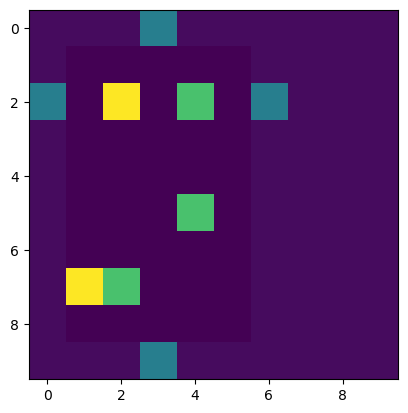

In [163]:
plt.imshow(Ax)

In [164]:
Comb = dfslot.groupby('Class').Name.unique().apply(list).apply(sorted).to_dict()
Comb['C'] + Comb['P']

[0, 1, 2, 3, 0, 1]

In [165]:
%%time
e = 'E0'
Path = []
# fig, ax = plt.subplots(figsize = (4,4))
# f = ax.imshow(Ax)
d = {} 
for begin in ['E0','E1','E2']:
    start = DictPos[begin]
    A = Ax.copy()
    A1 = Path1(A,start)
    for end in ['C0','C1','C2','C3','P0','P1']: 

        goal = DictPos[end]
         
        
        L = Path2(A1.copy() ,start,  goal)
        L = np.array(L)
        Path.append(L)

        dist = np.abs(np.diff(L.T)).sum()
        
        if end[0] == 'C' :            ID = begin + '-' + end
        else : ID = end + '-' + begin
#         print(begin,start, end , goal)
        d[ID] = dist


CPU times: total: 15.6 ms
Wall time: 4.96 ms


18

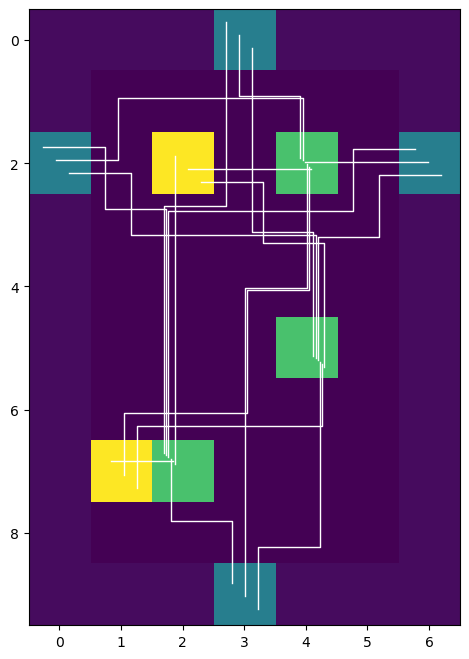

In [166]:
len(Path)
fig, ax = plt.subplots(figsize = (8,8))
masked = np.ma.masked_where(A0 <= 1, A0)
# f = ax.imshow(A0)
offset = np.linspace(-0.3,0.3,18)
for i, p in enumerate(Path):
        n = offset[i]
#         n = 0
        
        f = ax.plot(p[:,1]+n,p[:,0]+n,'w', linewidth=1)
f = ax.imshow(masked,alpha=1,cmap = 'Reds')
f = ax.imshow(A0)

In [167]:
d

{'E0-C0': 8,
 'E0-C1': 7,
 'E0-C2': 9,
 'E0-C3': 3,
 'P0-E0': 1,
 'P1-E0': 5,
 'E1-C0': 3,
 'E1-C1': 6,
 'E1-C2': 2,
 'E1-C3': 8,
 'P0-E1': 8,
 'P1-E1': 2,
 'E2-C0': 6,
 'E2-C1': 7,
 'E2-C2': 5,
 'E2-C3': 5,
 'P0-E2': 5,
 'P1-E2': 5}

In [168]:
Save = [DictPos, d]

In [169]:
dfline = algo.dfline.copy()
dfline['distPF'] = dfline.ID.map(d)-0.5
dfline['distRatio'] = (dfline.distPF / dfline.dist).round(1)
dfline[['dist','distPF']].corr()
dfline

,dist,distPF
dist,1.000000,0.981503
distPF,0.981503,1.000000


,Class,polyline,end,long,start,dist,ID,distPF,distRatio
0,C-E,"[[52, 12], [52, 56], [52, 116], [44, 116]]",0,4.0,0,2.24,E0-C0,7.5,3.3
1,C-E,"[[12, 40], [20, 40], [20, 104], [36, 104], [36...",0,3.0,1,2.00,E0-C1,6.5,3.2
2,C-E,"[[100, 44], [88, 44], [88, 120], [44, 120]]",0,3.0,2,2.64,E0-C2,8.5,3.2
3,C-E,"[[52, 148], [52, 124], [44, 124]]",0,2.0,3,0.64,E0-C3,2.5,3.9
4,C-E,"[[56, 12], [56, 24], [72, 24], [72, 36]]",1,1.0,0,0.80,E1-C0,2.5,3.1
5,C-E,"[[12, 36], [24, 36], [24, 28], [68, 28], [68, ...",1,2.0,1,1.44,E1-C1,5.5,3.8
6,C-E,"[[100, 36], [76, 36]]",1,1.0,2,0.48,E1-C2,1.5,3.1
7,C-E,"[[56, 148], [56, 56], [72, 56], [72, 44]]",1,2.0,3,2.40,E1-C3,7.5,3.1
8,C-E,"[[60, 12], [60, 84], [68, 84]]",2,0.0,0,1.60,E2-C0,5.5,3.4
9,C-E,"[[12, 44], [24, 44], [24, 88], [68, 88]]",2,3.0,1,2.00,E2-C1,6.5,3.2


# PF avec load excel map 

In [6]:
import matplotlib.patches as mpatch

In [58]:
dfmap = pd.read_excel('data.xlsx', sheet_name= 'map (1)', header=None)
dfmap

,0,1,2,3,4,5,6
0,1,1,1,C,1,1,1
1,1,0,0,0,0,0,1
2,C,0,P,0,E,0,C
3,1,0,0,0,0,0,1
4,1,E,1,0,0,0,1
5,1,0,1,0,E,0,1
6,1,0,0,0,0,0,1
7,1,0,E,P,0,0,1
8,1,0,0,0,0,0,1
9,1,1,1,C,1,1,1


In [59]:
SlotColor = {'C' : 10, 'E': 20, 'P' : 30}
A0 = dfmap.values
Size = max(A0.shape)
Comb = collections.defaultdict(list)
DictPos = {}
slots = ['C','P','E']
slotsN = dict(zip(slots,[0,0,0]))
ListBegin = []
ListEnd = []
ListWall = (np.argwhere(A0[1:-1,1:-1] == 1)+1).tolist()

for iy, ix in np.ndindex(A0.shape):
    v = A0[iy, ix]
    if type(v) == str: 
        slot = v[0]
        n = slotsN[slot]
        slotsN[slot] = n+1
        v = slot + str(n)
        A0[iy,ix] = SlotColor[slot]*20
        #Comb[v[0]].append(int(v[1:]))
        Comb[v[0]].append(int(n))
        DictPos[v] = (iy,ix)
        
        if slot == "E" : ListBegin.append(v)
        else : ListEnd.append(v)  
            
A0 = A0.astype(float)      
Comb
Ax = np.ones((Size,Size))
Ax[:A0.shape[0],:A0.shape[1]] = A0
DictPos
ListBegin, ListEnd = sorted(ListBegin), sorted(ListEnd)
ListBegin, ListEnd 


defaultdict(list, {'C': [0, 1, 2, 3], 'P': [0, 1], 'E': [0, 1, 2, 3]})

{'C0': (0, 3),
 'C1': (2, 0),
 'P0': (2, 2),
 'E0': (2, 4),
 'C2': (2, 6),
 'E1': (4, 1),
 'E2': (5, 4),
 'E3': (7, 2),
 'P1': (7, 3),
 'C3': (9, 3)}

(['E0', 'E1', 'E2', 'E3'], ['C0', 'C1', 'C2', 'C3', 'P0', 'P1'])

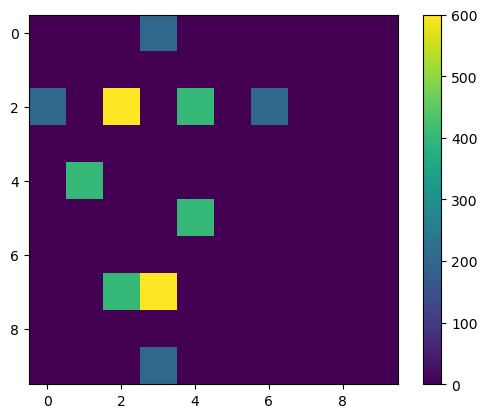

In [60]:
fig, ax = plt.subplots()
# im = ax.imshow(Aplot, cmap=plt.get_cmap('Accent'))
im = ax.imshow(Ax)
fig.colorbar(im)

In [61]:
%%time
# e = 'E0'
Path = {}
d = {} 
DictLine = {}

for begin in ListBegin:
    start = DictPos[begin]
    A = Ax.copy()
    A1 = Path1(A,start)
    for end in ListEnd: 
        goal = DictPos[end]        
        path = Path2(A1.copy() ,start,  goal)
        path = np.array(path)       
        dist = np.abs(np.diff(path.T)).sum()
        
        if end[0] == 'C' : ID = begin + '-' + end
        else : ID = end + '-' + begin
        #print(begin,start, end , goal)
#         Path.append(L)
        DictLine[ID] = {'path' : path, 'dist' : dist}
#         d[ID] = dist

CPU times: total: 0 ns
Wall time: 6 ms


In [19]:
pd.DataFrame(DictLine).T

,path,dist
E0-C0,"[[2, 4], [1, 4], [1, 3], [0, 3]]",3
E0-C1,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [2, 1...",6
E0-C2,"[[2, 4], [2, 5], [2, 6]]",2
E0-C3,"[[2, 4], [3, 4], [4, 4], [4, 5], [5, 5], [6, 5...",10
P0-E0,"[[2, 4], [2, 3], [2, 2]]",2
P1-E0,"[[2, 4], [3, 4], [4, 4], [4, 3], [5, 3], [6, 3...",7
E1-C0,"[[5, 4], [4, 4], [3, 4], [3, 3], [2, 3], [1, 3...",6
E1-C1,"[[5, 4], [4, 4], [3, 4], [3, 3], [3, 2], [3, 1...",7
E1-C2,"[[5, 4], [4, 4], [3, 4], [3, 5], [2, 5], [2, 6]]",5
E1-C3,"[[5, 4], [6, 4], [7, 4], [8, 4], [8, 3], [9, 3]]",5


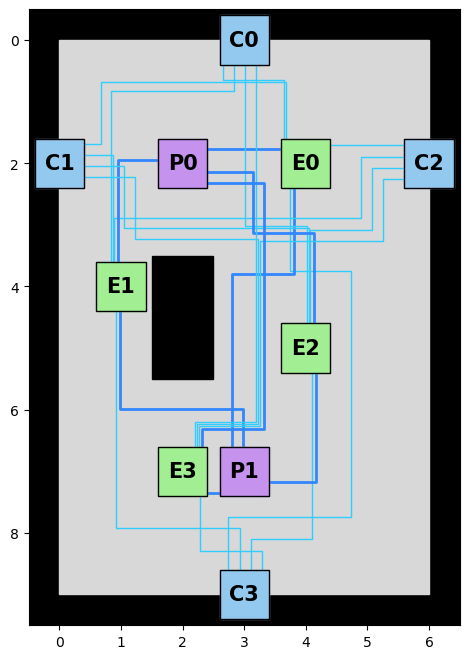

In [62]:
LenPath = len(DictLine)
Ymax , Xmax = A0.shape
PlotColor = {'C' : "#93c9ee", 'E': '#a2ee93', 'P' : "#c593ee"}
fig, ax = plt.subplots(figsize = (8,8))

f = ax.add_patch(mpatch.Rectangle((0,0), Xmax-1, Ymax-1, color='#d8d8d8'))
# masked = np.ma.masked_where(A0 <= 1, A0)
offset = np.linspace(-0.35,0.35,LenPath)
for i, (slot,data) in enumerate(DictLine.items()):
    n = offset[i]  
    p = data['path']
    if slot[0] == 'E' : 
        f = ax.plot(p[:,1]+n,p[:,0]+n,"#32cdff", linewidth=1, zorder=1, linestyle ='-')
    else : 
        f = ax.plot(p[:,1]+n,p[:,0]+n,"#3286ff", linewidth=2, zorder=1, linestyle ='-')

style = dict(size=15, color='black')
for slot, pos in DictPos.items(): 
    x , y = pos
    Type = slot[0]
    color = PlotColor[Type]
    f = ax.add_patch(mpatch.Rectangle((y-0.4,x-0.4), 0.8, 0.8, color=color))
    f = ax.add_patch(mpatch.Rectangle((y-0.4,x-0.4), 0.8, 0.8, color='black', fill = None))
    f = ax.text(y, x+0.1,slot , **style,  ha='center', weight='bold') 
#     f = ax.add_patch(mpatch.Rectangle((y-0.5,x-0.5), 1, 1, color='green'))

for x,y in ListWall: 
    f = ax.add_patch(mpatch.Rectangle((y-0.5,x-0.5), 1, 1, color='black'))
f = ax.imshow(np.zeros(A0.shape), cmap='gray',vmin=0,vmax=1)


In [12]:
dfline = algo.dfline.copy()
dfline['distPF'] = dfline.ID.map(d)-0.5
dfline['distRatio'] = (dfline.distPF / dfline.dist).round(1)
dfline[['dist','distPF']].corr()
dfline

,dist,distPF
dist,1.000000,0.981503
distPF,0.981503,1.000000


,Class,polyline,end,long,start,dist,ID,distPF,distRatio
0,C-E,"[[52, 12], [52, 56], [52, 116], [44, 116]]",0,4.0,0,2.24,E0-C0,7.5,3.3
1,C-E,"[[12, 40], [20, 40], [20, 104], [36, 104], [36...",0,3.0,1,2.00,E0-C1,6.5,3.2
2,C-E,"[[100, 44], [88, 44], [88, 120], [44, 120]]",0,3.0,2,2.64,E0-C2,8.5,3.2
3,C-E,"[[52, 148], [52, 124], [44, 124]]",0,2.0,3,0.64,E0-C3,2.5,3.9
4,C-E,"[[56, 12], [56, 24], [72, 24], [72, 36]]",1,1.0,0,0.80,E1-C0,2.5,3.1
5,C-E,"[[12, 36], [24, 36], [24, 28], [68, 28], [68, ...",1,2.0,1,1.44,E1-C1,5.5,3.8
6,C-E,"[[100, 36], [76, 36]]",1,1.0,2,0.48,E1-C2,1.5,3.1
7,C-E,"[[56, 148], [56, 56], [72, 56], [72, 44]]",1,2.0,3,2.40,E1-C3,7.5,3.1
8,C-E,"[[60, 12], [60, 84], [68, 84]]",2,0.0,0,1.60,E2-C0,5.5,3.4
9,C-E,"[[12, 44], [24, 44], [24, 88], [68, 88]]",2,3.0,1,2.00,E2-C1,6.5,3.2


In [17]:
d

{'E0-C0': 8,
 'E0-C1': 7,
 'E0-C2': 9,
 'E0-C3': 3,
 'P0-E0': 1,
 'P1-E0': 5,
 'E1-C0': 3,
 'E1-C1': 6,
 'E1-C2': 2,
 'E1-C3': 8,
 'P0-E1': 8,
 'P1-E1': 2,
 'E2-C0': 6,
 'E2-C1': 7,
 'E2-C2': 5,
 'E2-C3': 5,
 'P0-E2': 5,
 'P1-E2': 5}

In [ ]:
len(Path)
fig, ax = plt.subplots(figsize = (8,8))
masked = np.ma.masked_where(A0 <= 1, A0)
# f = ax.imshow(A0)
offset = np.linspace(-0.3,0.3,18)
for i, p in enumerate(Path):
        n = offset[i]
#         n = 0
        
        f = ax.plot(p[:,1]+n,p[:,0]+n,'w', linewidth=1)
# f = ax.imshow(masked,alpha=1,cmap = 'Reds')
f = ax.imshow(A0)

In [126]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

In [127]:
overlap

{'aqua',
 'aquamarine',
 'azure',
 'beige',
 'black',
 'blue',
 'brown',
 'chartreuse',
 'chocolate',
 'coral',
 'crimson',
 'cyan',
 'darkblue',
 'darkgreen',
 'fuchsia',
 'gold',
 'goldenrod',
 'green',
 'grey',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lightblue',
 'lightgreen',
 'lime',
 'magenta',
 'maroon',
 'navy',
 'olive',
 'orange',
 'orangered',
 'orchid',
 'pink',
 'plum',
 'purple',
 'red',
 'salmon',
 'sienna',
 'silver',
 'tan',
 'teal',
 'tomato',
 'turquoise',
 'violet',
 'wheat',
 'white',
 'yellow',
 'yellowgreen'}

# Run algo

In [2]:
file = {'SheetMapName' : 'map', 'uploaded_file' : None}

algo = load_data_brut(file)
algo.df = indiv_init(algo, 10)

Init algo namespace


In [3]:
algo.DataCategorie

{'Pompe': {'Unique': ['Pa', 'Pc'],
  'Values': {'Pa': {'Categorie': 'Pompe',
    'Composants': 'Pompe 1',
    'Type': 'Single',
    'Masse': 136.0,
    'Cout': 2.5,
    'Actif': 1.0,
    'a': -0.000516,
    'b': -0.0154,
    'c': 4.87},
   'Pc': {'Categorie': 'Pompe',
    'Composants': 'Pompe 3',
    'Type': 'Brushless',
    'Masse': 330.0,
    'Cout': 24.0,
    'Actif': 1.0,
    'a': -0.000661,
    'b': -0.0286,
    'c': 12.1}}},
 'EV': {'Unique': ['Ea'],
  'Values': {'Ea': {'Categorie': 'EV',
    'Composants': 'EV_A',
    'Type': 'Electrovanne',
    'Masse': 110.0,
    'Cout': 6.0,
    'Actif': 1.0,
    'a': 0.00764}}},
 'Tuyau': {'Unique': ['Ta'],
  'Values': {'Ta': {'Categorie': 'Tuyau',
    'Composants': 'Tuyau 1',
    'Type': '4 mm',
    'Masse': 46.0,
    'Cout': 0.35,
    'Actif': 1.0,
    'a': 0.000235}}},
 'Reservoir': {'Unique': ['Ra'],
  'Values': {'Ra': {'Categorie': 'Reservoir',
    'Composants': '1 Réservoir',
    'Masse': 600.0,
    'Cout': 25.0,
    'Actif': 1.0,
    '

In [4]:
Name =  'E0-C1,E1-C2,E2-C0,E2-C3,P0-E1,P1-E0,P1-E2'
indiv = Indiv_reverse(Name,algo) 
indiv

{'Clist': [0, 1, 2, 3],
 'CtoE': [2, 0, 1, 2],
 'Econnect': {0: [1], 1: [2], 2: [0, 3]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [1, 0, 1],
 'Pconnect': {0: [1], 1: [0, 2]},
 'Plist': [0, 1],
 'Pcount': 2,
 'Ptype': array(['Pc', 'Pa', 'Pc'], dtype='<U2'),
 'List_EtoC': [['E0-C1'], ['E1-C2'], ['E2-C0', 'E2-C3']],
 'List_PtoE': [['P0-E1'], ['P1-E0', 'P1-E2']],
 'dist_Connect': {'E0-C1': 0.6,
  'P1-E0': 0.8,
  'E1-C2': 0.5,
  'P0-E1': 0.5,
  'E2-C0': 0.8,
  'E2-C3': 0.3,
  'P1-E2': 0.1},
 'dist': 3.6,
 'Name': ['E0-C1', 'E1-C2', 'E2-C0', 'E2-C3', 'P0-E1', 'P1-E0', 'P1-E2'],
 'ID': 11,
 'Name_txt': 'E0-C1,E1-C2,E2-C0,E2-C3,P0-E1,P1-E0,P1-E2',
 'Epoch': 0,
 'PressionList': [11.09, 11.06, 4.51, 11.13],
 'DebitList': [17.55, 17.53, 11.19, 17.58],
 'Debit': 63.8,
 'Masse': 1613,
 'Cout': 62,
 'Alive': True}

In [12]:
SelectLine = algo.DictLine.keys()
SelectSlot = algo.DictPos.keys()

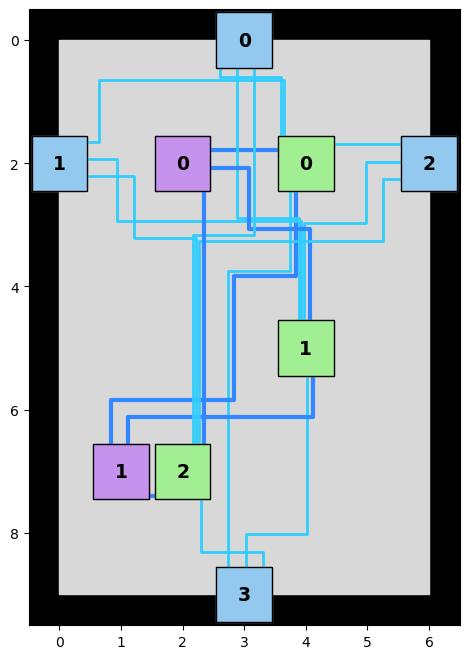

In [13]:
SelectLine = algo.DictLine.keys()
SelectSlot = algo.DictPos.keys()
fig = new_plot(algo, SelectLine, SelectSlot)

In [33]:
aa = [0,1,2,3]
aa[1:-1]

[1, 2]

# MAsse cout 

In [7]:
indiv['Ptype']

array(['Pc', 'Pa', 'Pc'], dtype='<U2')

In [15]:
Categorie = 'Pompe'
Ptype = indiv['Ptype']
dmasse[Categorie] = int(sum([algo.DataCategorie[Categorie]['Values'][pt]['Masse'] for pt in Ptype]))
dcout[Categorie]  = int(sum([algo.DataCategorie[Categorie]['Values'][pt]['Cout'] for pt in Ptype]))

In [16]:

dmasse = {}
dcout = {}
# confs = algo.confs

for Categorie in ['Pompe', 'Tuyau','EV']:
    v = algo.DataCategorie[Categorie]['Values']
    if Categorie == 'Pompe' : 
        Ptype = indiv['Ptype']
        dmasse[Categorie] = int(sum([algo.DataCategorie[Categorie]['Values'][pt]['Masse'] for pt in Ptype]))
        dcout[Categorie]  = int(sum([algo.DataCategorie[Categorie]['Values'][pt]['Cout']  for pt in Ptype]))
    if Categorie == 'Tuyau' :
        Factor = indiv['dist']
        Name = algo.Tuyau
        dmasse[Categorie] = int(sum([Factor * v[n]['Masse'] for n in Name]))
        dcout[Categorie]  = int(sum([Factor * v[n]['Cout']  for n in Name]))
    if Categorie == 'EV' :
        Ccount = len(algo.Comb['C'])
        Factor = Ccount
        Name = algo.EV  
        dmasse[Categorie] = int(sum([Factor * v[n]['Masse'] for n in Name]))
        dcout[Categorie]  = int(sum([Factor * v[n]['Cout']  for n in Name]))
        
dmasse['Reservoir'] = 600
dcout['Reservoir']  = 30  
info = [dmasse, dcout]
Masse = round(sum(dmasse.values()),2)
Cout = round(sum(dcout.values()),2)
info, { 'Masse' : Masse, 'Cout' : Cout}

([{'Pompe': 796, 'Tuyau': 165, 'EV': 440, 'Reservoir': 600},
  {'Pompe': 50, 'Tuyau': 1, 'EV': 24, 'Reservoir': 30}],
 {'Masse': 2001, 'Cout': 105})

# Pompes

In [30]:
file = {'SheetMapName' : 'map', 'uploaded_file' : None}

algo = load_data_brut(file)
algo.df = indiv_init(algo, 10)

Init algo namespace


In [25]:
ListPompes = algo.DataCategorie['Pompe']['Unique']
dict(zip(ListPompes, [2]*len(ListPompes)))

{'Pa': 2, 'Pc': 2}

In [4]:
algo.DataCategorie

{'Pompe': {'Unique': ['Pa', 'Pc'],
  'Values': {'Pa': {'Categorie': 'Pompe',
    'Composants': 'Pompe 1',
    'Type': 'Single',
    'Masse': 136.0,
    'Cout': 2.5,
    'Actif': 1.0,
    'a': -0.000516,
    'b': -0.0154,
    'c': 4.87},
   'Pc': {'Categorie': 'Pompe',
    'Composants': 'Pompe 3',
    'Type': 'Brushless',
    'Masse': 330.0,
    'Cout': 24.0,
    'Actif': 1.0,
    'a': -0.000661,
    'b': -0.0286,
    'c': 12.1}}},
 'EV': {'Unique': ['Ea'],
  'Values': {'Ea': {'Categorie': 'EV',
    'Composants': 'EV_A',
    'Type': 'Electrovanne',
    'Masse': 110.0,
    'Cout': 6.0,
    'Actif': 1.0,
    'a': 0.00764}}},
 'Tuyau': {'Unique': ['Ta'],
  'Values': {'Ta': {'Categorie': 'Tuyau',
    'Composants': 'Tuyau 1',
    'Type': '4 mm',
    'Masse': 46.0,
    'Cout': 0.35,
    'Actif': 1.0,
    'a': 0.000235}}},
 'Reservoir': {'Unique': ['Ra'],
  'Values': {'Ra': {'Categorie': 'Reservoir',
    'Composants': '1 Réservoir',
    'Masse': 600.0,
    'Cout': 25.0,
    'Actif': 1.0,
    '

In [31]:
Name =  'E0-C1,E1-C2,E2-C0,E2-C3,P0-E1,P1-E0,P1-E2'
indiv = Indiv_reverse(Name,algo) 
indiv

{'Clist': [0, 1, 2, 3],
 'CtoE': [2, 0, 1, 2],
 'Econnect': {0: [1], 1: [2], 2: [0, 3]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [1, 0, 1],
 'Pconnect': {0: [1], 1: [0, 2]},
 'Plist': [0, 1],
 'Pcount': 2,
 'Ptype': array(['Pc', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C1'], ['E1-C2'], ['E2-C0', 'E2-C3']],
 'List_PtoE': [['P0-E1'], ['P1-E0', 'P1-E2']],
 'dist_Connect': {'E0-C1': 0.6,
  'P1-E0': 0.8,
  'E1-C2': 0.5,
  'P0-E1': 0.5,
  'E2-C0': 0.8,
  'E2-C3': 0.3,
  'P1-E2': 0.1},
 'dist': 3.6,
 'Name': ['E0-C1', 'E1-C2', 'E2-C0', 'E2-C3', 'P0-E1', 'P1-E0', 'P1-E2'],
 'ID': 11,
 'Name_txt': 'E0-C1,E1-C2,E2-C0,E2-C3,P0-E1,P1-E0,P1-E2',
 'Epoch': 0,
 'PressionList': [4.51, 4.5, 4.51, 4.52],
 'DebitList': [11.19, 11.18, 11.19, 11.21],
 'Debit': 44.8,
 'Masse': 1613,
 'Cout': 62,
 'Alive': True}

In [26]:
Plist = indiv['Plist']

In [65]:
EcMax = 2
NewCtoE = np.array([0,1,2,0])
NewCtoE
Elist = np.unique(NewCtoE)
Elist
Ecount = len(Elist)
Ecount > EcMax
n = Ecount -  EcMax 
Edrop = np.random.choice(Elist,n, replace=False)
Edrop
Edispo = Elist[~np.isin(Elist, Edrop)]
Edispo
mask = np.isin(NewCtoE,Edrop)
mask
NewCtoE[mask] = np.random.choice(Edispo,mask.sum())
NewCtoE

array([0, 1, 2, 0])

array([0, 1, 2])

True

array([2])

array([0, 1])

array([False, False,  True, False])

array([0, 1, 1, 0])

In [71]:
prime_numbers = [2, 3, 5, 9, 9, 11]
prime_numbers.remove(9)
prime_numbers

[2, 3, 5, 9, 11]

In [70]:
EcMax = 2
NewCtoE = np.array([0,1,2,0])
Elist = np.unique(NewCtoE)
Ecount = len(Elist)
n = Ecount -  EcMax 
if n > 0:
    Edrop = np.random.choice(Elist,n, replace=False)
    Edispo = Elist[~np.isin(Elist, Edrop)]
    mask = np.isin(NewCtoE,Edrop)
    NewCtoE[mask] = np.random.choice(Edispo,mask.sum())
NewCtoE

array([2, 1, 2, 2])

In [48]:
mask = np.isin(NewCtoE,Edrop)
mask
NewCtoE[mask] = np.random.choice(Edispo,mask.sum())
NewCtoE

array([False,  True, False, False])

array([1])

array([2])

In [ ]:
idx = 0
p = 

In [29]:
arr = range(5)
arr
# numbers below will never contain repeated numbers (replace=False)
numbers = np.random.choice(arr, 3, replace=False) 
numbers

range(0, 5)

array([0, 4, 1])

In [27]:
Calcul_Debit(algo ,indiv, split = False)

{'PressionList': [4.51, 4.5, 4.51, 4.52],
 'DebitList': [11.19, 11.18, 11.19, 11.21],
 'Debit': 44.8}

## plot

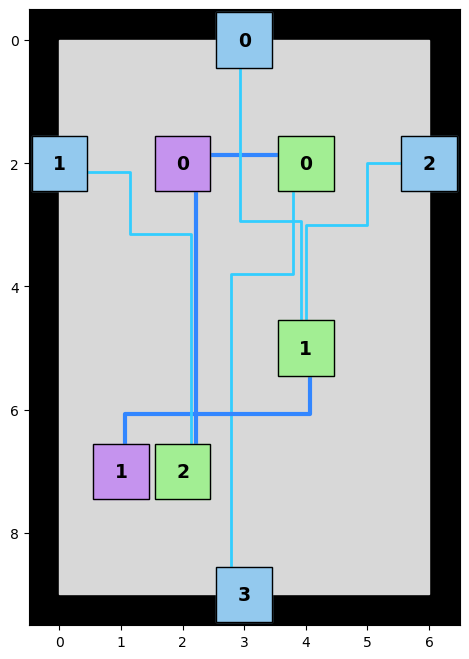

In [24]:
# SelectLine = algo.DictLine.keys()
# SelectSlot = algo.DictPos.keys()

row = algo.df.iloc[0]
                        
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name

fig = new_plot(algo, SelectLine, SelectSlot)